### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageOps
import time

% matplotlib inline

2023-03-31 13:11:37.728326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 13:11:37.795869: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 13:11:38.644476: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2023-03-31 13:11:38.644530: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2023-03-31 13:11:38.646540: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd

In [2]:
import tensorflow as tf

tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

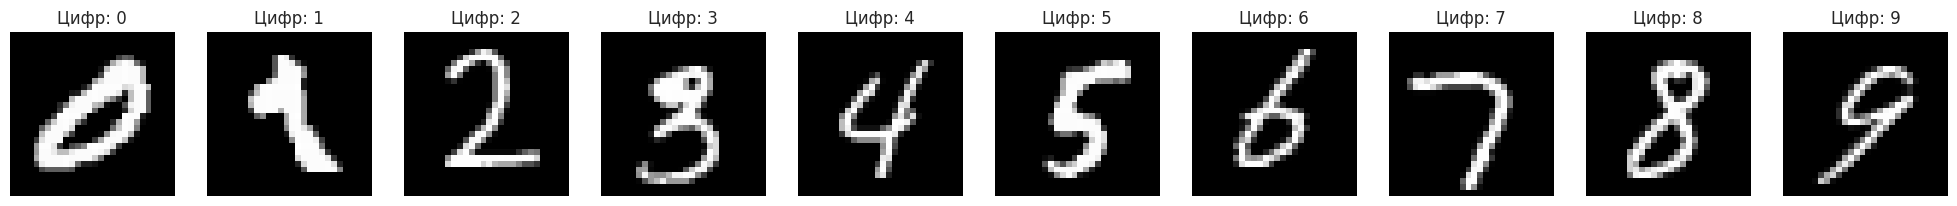

In [4]:
fig, ax = plt.subplots(1, 10, figsize=(25, 3))

for i in range(10):
    label_indexs = np.where(y_train == i)[0]
    index = random.choice(label_indexs)
    img = x_train[index]
    ax[i].set_title(f'Цифр: {i}')
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')


In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [7]:
x_train = x_train / 255.
x_test = x_test / 255.

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


2023-03-31 13:11:50.319631: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 13:11:50.321897: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (NVIDIA GeForce RTX 4070 Ti)
2023-03-31 13:11:50.447669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-31 13:11:50.447708: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2023-03-31 13:11:50.447727: I tensorflow/core/common_runtime/pluggable_device/plugga

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

In [10]:
EPOCHS = 10
BATCH_SIZE = 50
VERBOSE = 1

In [11]:
history = model.fit(x_train,
                    y_train,
                    validation_split=0.3,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1
                    )

Epoch 1/10


2023-03-31 13:11:57.495124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


836/840 [============================>.] - ETA: 0s - loss: 0.2088 - accuracy: 0.9356

2023-03-31 13:12:06.079969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


840/840 [==============================] - 10s 7ms/step - loss: 0.2081 - accuracy: 0.9358 - val_loss: 0.0687 - val_accuracy: 0.9786
Epoch 2/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 3/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0527 - accuracy: 0.9835 - val_loss: 0.0433 - val_accuracy: 0.9874
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 5/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 6/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.0407 - val_accuracy: 0.9894
Epoch 7/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0408 - val_accuracy: 0.9888
Epoch 8/10
840/8

In [12]:
model.save('model_conv_lite.h5')

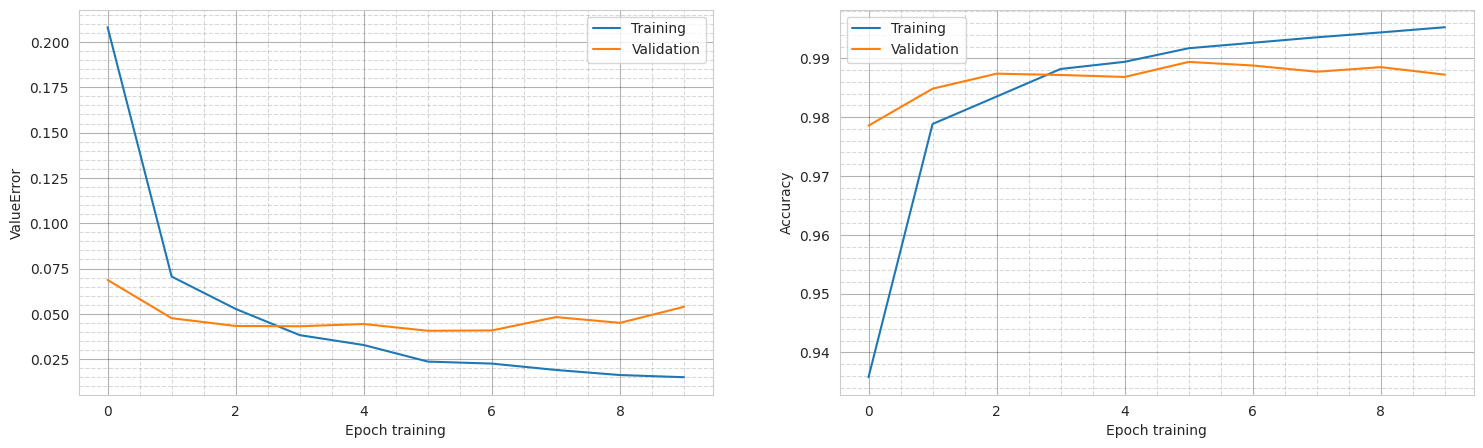

In [13]:
def plot_history(history):
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 2, 1)

    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')

    plt.xlabel('Epoch training')
    plt.ylabel('ValueError')

    plt.legend()

    plt.grid(which='major', color='black', alpha=0.3)
    plt.minorticks_on()
    plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

    plt.subplot(1, 2, 2)

    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')

    plt.xlabel('Epoch training')
    plt.ylabel('Accuracy')

    plt.legend()

    plt.grid(which='major', color='black', alpha=0.3)
    plt.minorticks_on()
    plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

    plt.show()


plot_history(history)

In [14]:
def evalueteModel(bn1, bn2):
    model = Sequential()
    if bn1:
        model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

    if bn2:
        model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

    history = model.fit(x_train,
                        y_train,
                        validation_split=0.3,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        verbose=1
                        )
    return max(history.history['val_accuracy'])

In [15]:
result_df = pd.DataFrame()

i = 0
start_time = time.time()
for bn1 in (True, False):
    for bn2 in (True, False):
        current_result = {1: str(bn1),
                          2: str(bn2),
                          'max_accuracy': round(evalueteModel(bn1, bn2), 5)}
        i += 1
        print(i, current_result)
        result_df = result_df.append(current_result, ignore_index=True)
print(f'\n Time: {round(time.time() / 60 - start_time / 60, 2)} минут')



Epoch 1/10


2023-03-31 13:13:25.594268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


839/840 [============================>.] - ETA: 0s - loss: 0.2560 - accuracy: 0.9236

2023-03-31 13:13:31.543216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


840/840 [==============================] - 7s 7ms/step - loss: 0.2558 - accuracy: 0.9237 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 2/10
840/840 [==============================] - 7s 8ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.0530 - val_accuracy: 0.9844
Epoch 3/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0556 - val_accuracy: 0.9846
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0476 - val_accuracy: 0.9863
Epoch 5/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 6/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 7/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0454 - val_accuracy: 0.9873
Epoch 8/10
840/84

/tmp/ipykernel_15468/282038768.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(current_result, ignore_index=True)


 16/840 [..............................] - ETA: 6s - loss: 1.4430 - accuracy: 0.5288

2023-03-31 13:14:36.360984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


837/840 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9431

2023-03-31 13:14:42.797933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


840/840 [==============================] - 7s 9ms/step - loss: 0.1821 - accuracy: 0.9432 - val_loss: 0.0551 - val_accuracy: 0.9829
Epoch 2/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 3/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0445 - val_accuracy: 0.9873
Epoch 5/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0496 - val_accuracy: 0.9872
Epoch 6/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 7/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 8/10
840/84

/tmp/ipykernel_15468/282038768.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(current_result, ignore_index=True)


 11/840 [..............................] - ETA: 8s - loss: 2.5558 - accuracy: 0.3364

2023-03-31 13:15:48.043176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


836/840 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9318

2023-03-31 13:15:54.692728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


840/840 [==============================] - 8s 9ms/step - loss: 0.2290 - accuracy: 0.9320 - val_loss: 0.0588 - val_accuracy: 0.9824
Epoch 2/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0845 - accuracy: 0.9747 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 3/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0576 - val_accuracy: 0.9828
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 5/10
840/840 [==============================] - 7s 9ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0505 - val_accuracy: 0.9872
Epoch 6/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0347 - accuracy: 0.9889 - val_loss: 0.0458 - val_accuracy: 0.9881
Epoch 7/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.0475 - val_accuracy: 0.9882
Epoch 8/10
840/84

/tmp/ipykernel_15468/282038768.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(current_result, ignore_index=True)


Epoch 1/10
 16/840 [..............................] - ETA: 5s - loss: 1.6113 - accuracy: 0.4975

2023-03-31 13:16:59.848675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


836/840 [============================>.] - ETA: 0s - loss: 0.2088 - accuracy: 0.9363

2023-03-31 13:17:06.044694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


840/840 [==============================] - 7s 8ms/step - loss: 0.2081 - accuracy: 0.9365 - val_loss: 0.0751 - val_accuracy: 0.9768
Epoch 2/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0735 - accuracy: 0.9776 - val_loss: 0.0523 - val_accuracy: 0.9835
Epoch 3/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0514 - val_accuracy: 0.9854
Epoch 4/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.0489 - val_accuracy: 0.9872
Epoch 5/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0446 - val_accuracy: 0.9877
Epoch 6/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0277 - accuracy: 0.9906 - val_loss: 0.0521 - val_accuracy: 0.9859
Epoch 7/10
840/840 [==============================] - 7s 8ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0425 - val_accuracy: 0.9889
Epoch 8/10
840/84

/tmp/ipykernel_15468/282038768.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(current_result, ignore_index=True)


In [16]:
result_df

,1,2,max_accuracy
0,True,True,0.98906
1,True,False,0.98967
2,False,True,0.98844
3,False,False,0.98933


In [17]:
model = load_model('model_conv_lite.h5')

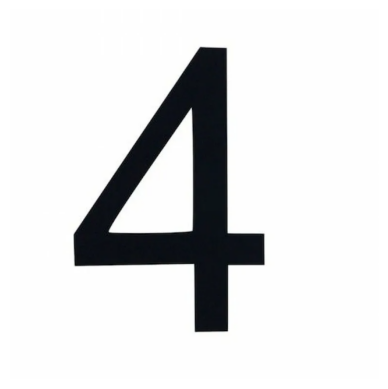

In [62]:
img6 = Image.open('digit_4.png')
plt.imshow(img6)
plt.axis('off')
plt.show()

In [63]:
def test_img(path):
    img = Image.open(path)
    # Приведение к черно-белому
    test_img = ImageOps.grayscale(img)
    # Инвертирование цветов
    test_img = ImageOps.invert(test_img)
    test_img = test_img.resize((28, 28))
    test_img = np.array(test_img) / 255.
    return test_img

In [64]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

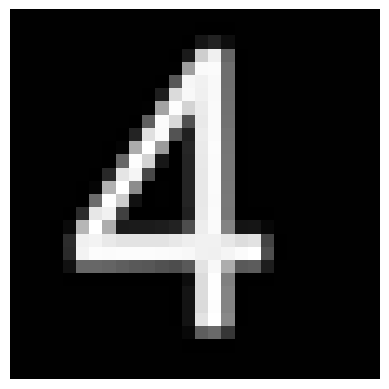

In [65]:
test_image = test_img('digit_4.png')
show_img(test_image)

In [66]:
test_image = test_image[np.newaxis, ..., np.newaxis]

In [67]:
model.layers

In [68]:
first_conv_out = model.layers[0](test_image)


In [69]:
first_conv_out.shape

TensorShape([1, 28, 28, 32])

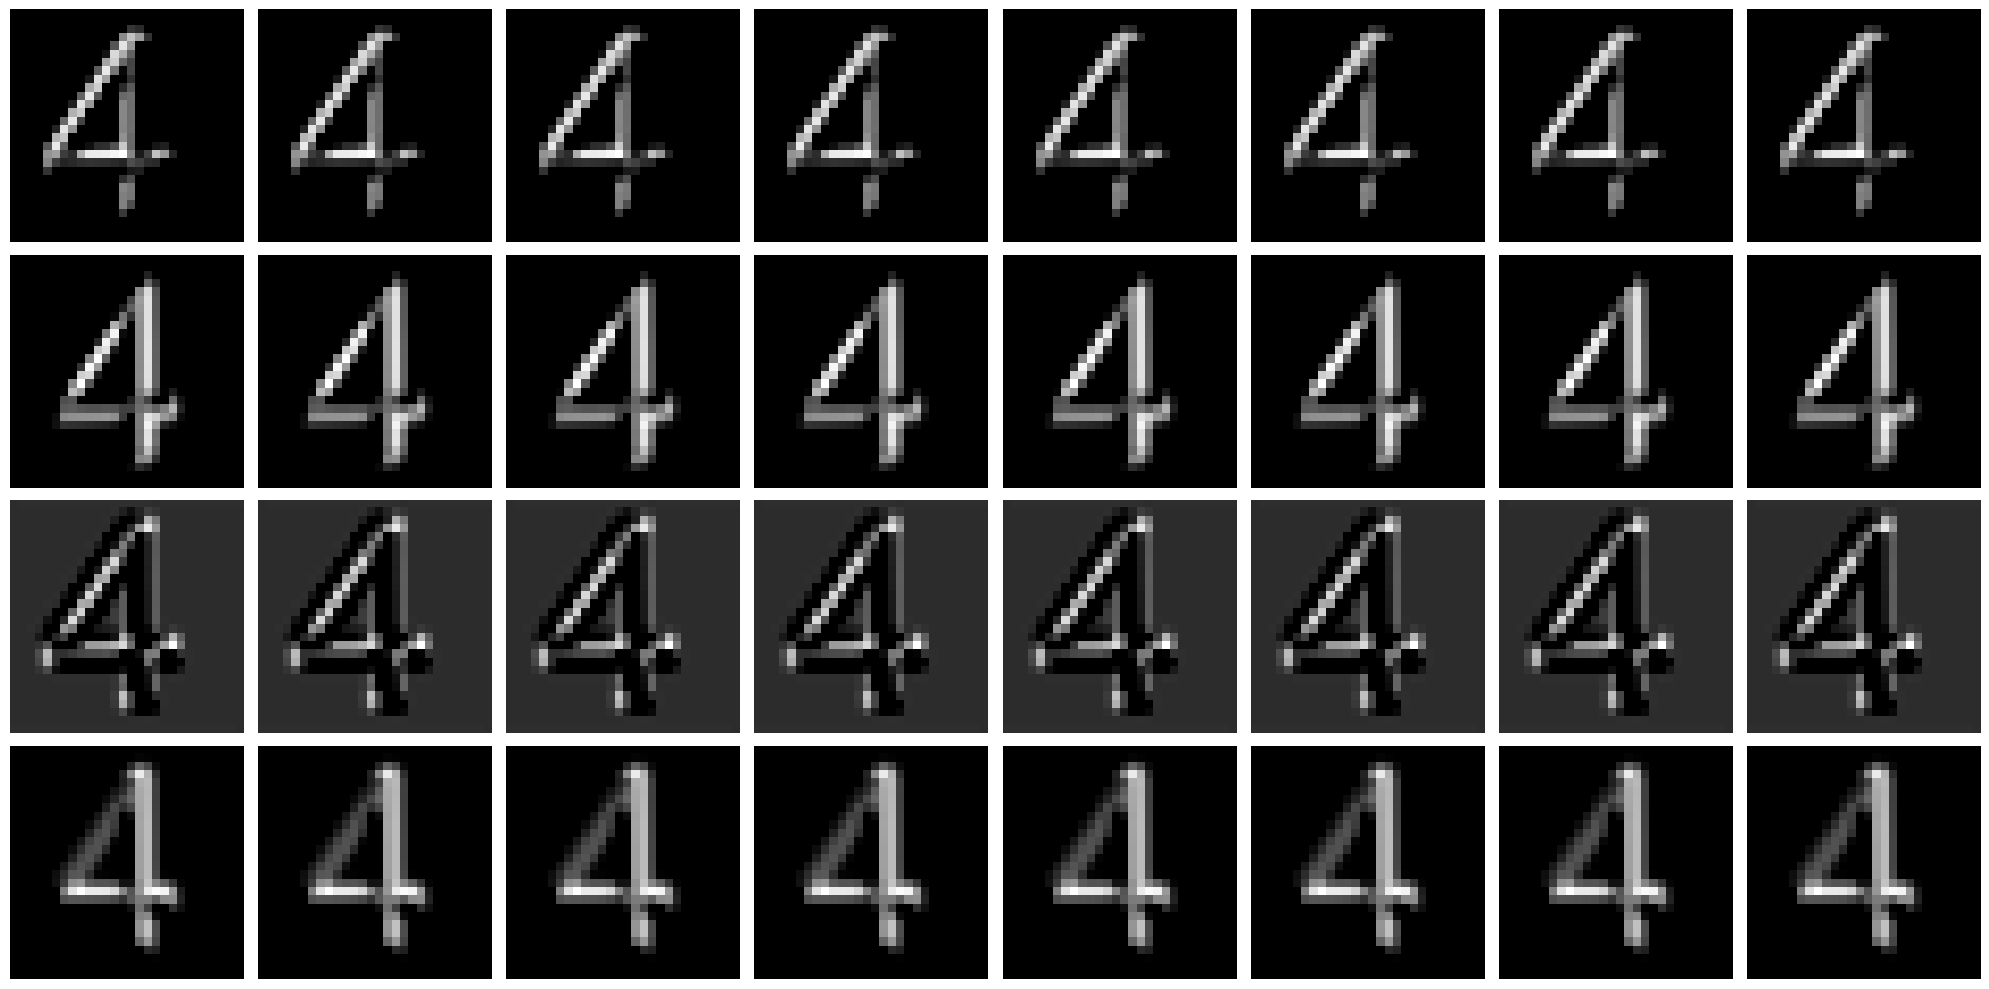

In [70]:

nrows = 4
ncols = 8

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for i in range(nrows):
    for j in range(ncols):
        index = i * ncols + j
        ax = axs[i][j]
        ax.imshow(first_conv_out[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()


In [71]:
second_conv_out = model.layers[1](first_conv_out)

In [72]:
second_conv_out.shape

TensorShape([1, 28, 28, 32])

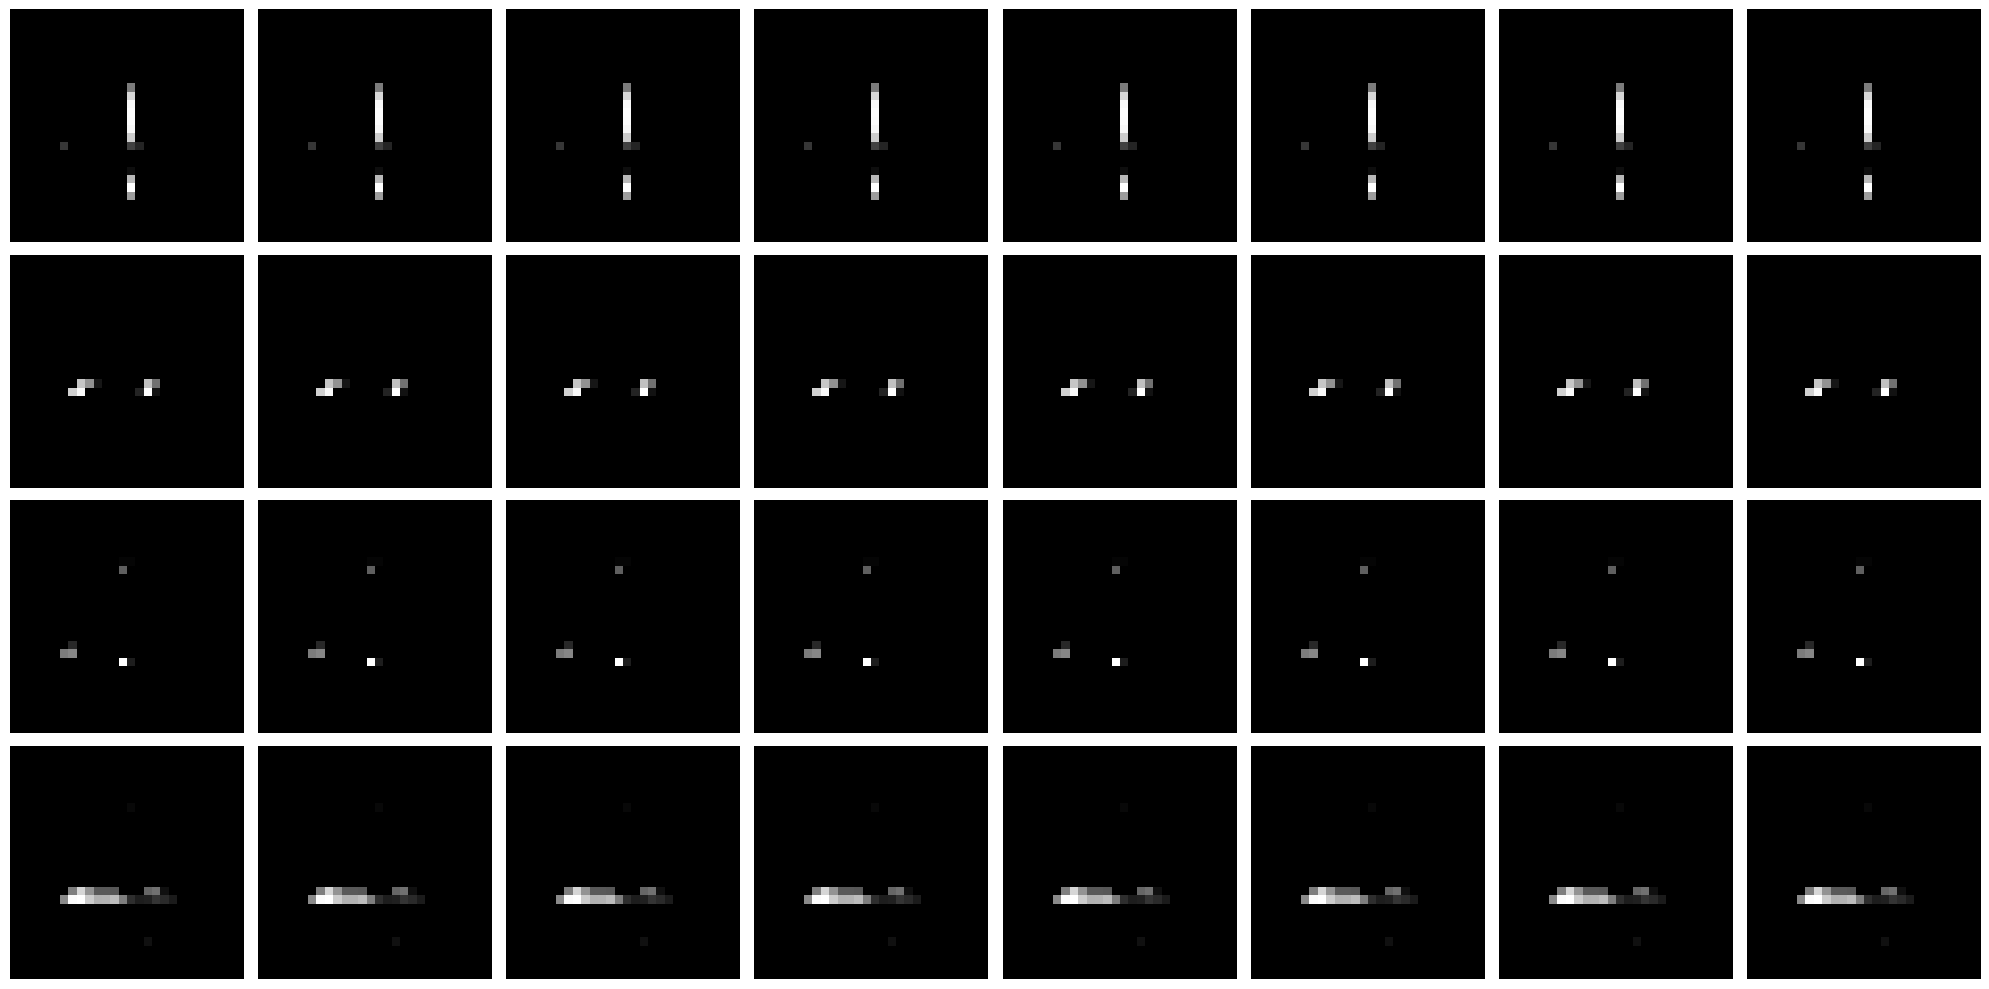

In [73]:
nrows = 4
ncols = 8

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for i in range(nrows):
    for j in range(ncols):
        index = i * ncols + j
        ax = axs[i][j]
        ax.imshow(second_conv_out[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [74]:
max_pool_out = model.layers[2](second_conv_out)
max_pool_out.shape

TensorShape([1, 14, 14, 32])

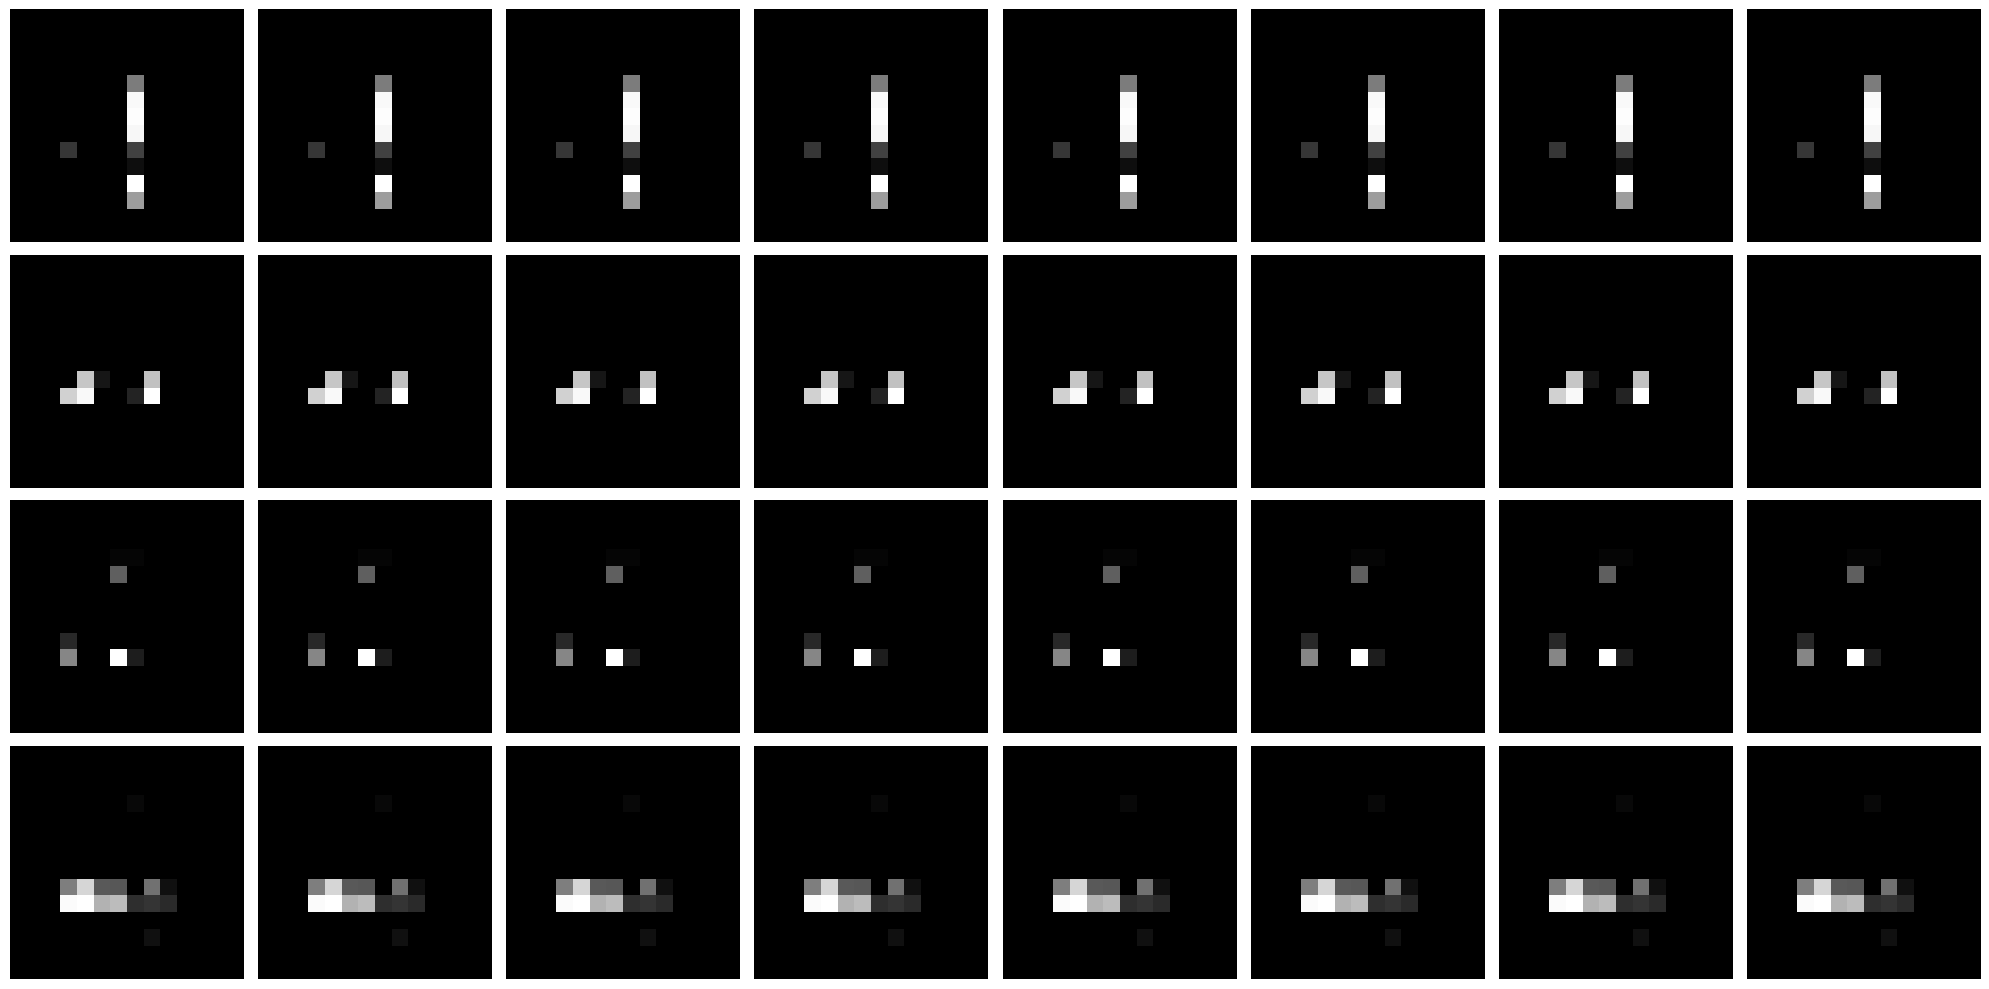

In [75]:
nrows = 4
ncols = 8

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))

for i in range(nrows):
    for j in range(ncols):
        index = i * ncols + j
        ax = axs[i][j]
        ax.imshow(max_pool_out[0, :, :, i], cmap='gray')
        ax.axis('off')
plt.tight_layout()
plt.show()

In [76]:
predict = model.predict(test_image)[0]
number = np.argmax(predict)
probability = predict[np.argmax(predict)]
print(f'Predicted {number} with probability {round(probability * 100, 2)}%')

1/1 [==============================] - 0s 22ms/step
Predicted 4 with probability 99.73%


In [77]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]